In [0]:
# 예제 10.1 - MountainCar-v0 환경 만들기
import gym
import random
env = gym.make('MountainCar-v0')

In [9]:
# 예제 10.2 - 환경의 관찰 공간, 행동 공간 변수 확인
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print()
print(env._max_episode_steps)

Box(2,)
[-1.2  -0.07]
[0.6  0.07]

Discrete(3)

200


In [0]:
# 예제 10.3 - 랜덤한 행동을 하는 에이전트 실행
step = 0
score = 0
env.reset()

while True:
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  print(score)
  score += reward
  step += 1

  if done:
    break

print('score :', score)
print('step :', step)

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


In [0]:
# 예제 10.4 - 랜덤 행동 에이전트의 환경 실행 결과 확인
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0

while True:
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  score += reward
  step += 1

  if done:
    break

print('score :', score)
print('step :', step)
env.close()
show_video()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.929
[-188.0, -182.0, -176.0, -180.0, -156.0, -166.0, -196.0, -192.0, -186.0, -170.0, -196.0, -176.0, -178.0, -158.0, -178.0, -184.0, -178.0, -188.0, -176.0, -180.0, -188.0, -176.0, -176.0, -178.0, -172.0, -168.0, -180.0, -194.0, -184.0, -182.0, -176.0, -188.0, -176.0, -170.0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


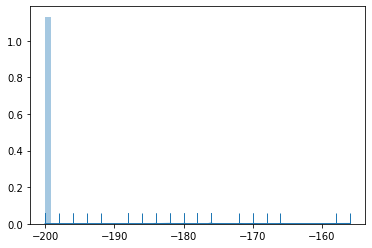

In [10]:
# 예제 10.5 - 성공적인 에피소드 저장
import numpy as np

env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
  if i % 100 == 0:
    print(i)
  
  env.reset()
  score = 0
  game_memory = []
  previous_obs = []

  while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    if len(previous_obs) > 0:
      game_memory.append([previous_obs, action])
    
    previous_obs = obs
    if obs[0] > -0.2:
      reward = 1

    score += reward

    if done:
      break

  scores.append(score)
  if score > required_score:
    accepted_scores.append(score)
    for data in game_memory:
      training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug = True)

In [11]:
# 예제 10.6 - training_data 확인
training_data[: 5]

[[array([-0.47126911, -0.00140124]), 1],
 [array([-0.47306121, -0.0017921 ]), 0],
 [array([-0.4762309 , -0.00316968]), 1],
 [array([-0.47975464, -0.00352375]), 2],
 [array([-0.48260627, -0.00285163]), 0]]

In [12]:
# 예제 10.7 - 훈련 데이터 만들기
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)

print(train_X.shape)
print(train_Y.shape)

(6766, 2)
(6766, 1)


In [0]:
# 예제 10.8 - 분류 신경망 정의
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128, input_shape = (2, ), activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# 예제 10.9 - 분류 신경망 학습
history = model.fit(train_X, train_Y, epochs = 30, batch_size = 16, validation_split = 0.25)

Epoch 1/30
318/318 [==============================] - 1s 3ms/step - loss: 1.0996 - accuracy: 0.3412 - val_loss: 1.0973 - val_accuracy: 0.3463
Epoch 2/30
318/318 [==============================] - 1s 3ms/step - loss: 1.0974 - accuracy: 0.3567 - val_loss: 1.0983 - val_accuracy: 0.3706
Epoch 3/30
318/318 [==============================] - 1s 2ms/step - loss: 1.0968 - accuracy: 0.3616 - val_loss: 1.0938 - val_accuracy: 0.4037
Epoch 4/30
318/318 [==============================] - 1s 2ms/step - loss: 1.0939 - accuracy: 0.3823 - val_loss: 1.0912 - val_accuracy: 0.3877
Epoch 5/30
318/318 [==============================] - 1s 2ms/step - loss: 1.0900 - accuracy: 0.3936 - val_loss: 1.0866 - val_accuracy: 0.4019
Epoch 6/30
318/318 [==============================] - 1s 2ms/step - loss: 1.0872 - accuracy: 0.3971 - val_loss: 1.0851 - val_accuracy: 0.4007
Epoch 7/30
318/318 [==============================] - 1s 2ms/step - loss: 1.0865 - accuracy: 0.3946 - val_loss: 1.0853 - val_accuracy: 0.4013
Epoch 

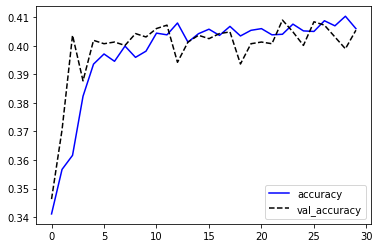

In [15]:
# 예제 10.10 - 분류 신경망 학습 결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.legend()
plt.show()

In [18]:
# 예제 10.11 - 분류 신경망으로 에이전트 행동을 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
steps = []
actions = []

for i in range(500):
  if i % 100 == 0:
    print(i)

  score = 0
  step = 0
  previous_obs = []
  env.reset()

  while True:
    if len(previous_obs) == 0:
      action = env.action_space.sample()
    else:
      logit = model.predict(np.expand_dims(previous_obs, axis = 0))[0]
      action = np.argmax(logit)
      actions.append(action)

    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1

    if done:
      break

  scores.append(score)
  steps.append(step)

0
100
200
300
400


-121.968


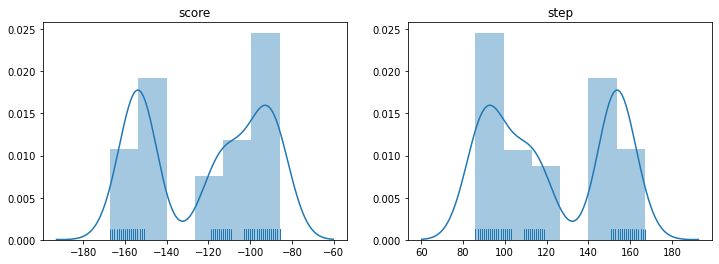

In [19]:
# 예제 10.12 - score, step 분포 확인
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].set_title('score')
ax[1].set_title('step')

sns.distplot(scores, rug = True, ax = ax[0])
sns.distplot(steps, rug = True, ax = ax[1])

print(np.mean(scores))

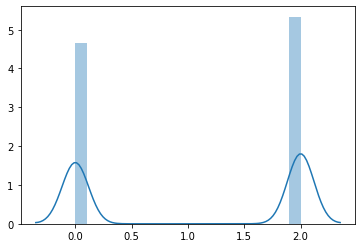

In [20]:
# 예제 10.13 - 행동 분포 확인
sns.distplot(actions)

In [0]:
# 예제 10.14 - 분류 신경망 행동 에이전트의 실행 결과 확인
env.close()
env = wrap_env(gym.make("MountainCar-v0"))
env.reset()

score = 0
step = 0
previous_obs = []

while True:
  if len(previous_obs) == 0:
    action = env.action_space.sample()
  else:
    logit = model.predict(np.expand_dims(previous_obs, axis = 0))[0]
    # logit = logit.astype(float)
    # logit = logit / logit.sum()
    # prob = np.random.multinomial(1, logit)
    # action = np.argmax(prob)
    action = np.argmax(logit)

  obs, reward, done, info = env.step(action)
  previous_obs = obs
  score += reward
  step += 1

  if done:
    break

print('score :', score)
print('step :', step)
env.close()
show_video()